# Inteligenta Artificiala
# Laboratorul 2
# Naive Bayes
# P(C | X ) = (P(X | C) * P(C)) / P(X)

### Imports

In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm

### Download and unzip data

In [3]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip
!unzip data_MNIST.zip

--2022-03-01 09:02:17--  https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629644 (615K) [application/zip]
Saving to: ‘data_MNIST.zip’

data_MNIST.zip      100%[===================>] 614.89K  --.-KB/s    in 0.04s   

2022-03-01 09:02:17 (13.9 MB/s) - ‘data_MNIST.zip’ saved [629644/629644]

Archive:  data_MNIST.zip
replace data/test_images.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/test_images.txt    
replace data/test_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/test_labels.txt    
replace data/train_images.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/train_images.txt   
replace data/train_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating

### Load data

In [10]:
train_images = np.loadtxt('./data/train_images.txt')
train_labels = np.int32(np.loadtxt('./data/train_labels.txt'))

test_images = np.loadtxt('./data/test_images.txt')
test_labels = np.int32(np.loadtxt('./data/test_labels.txt'))

# Execises

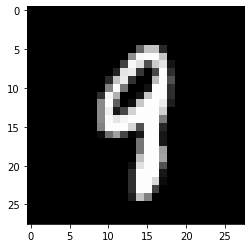

In [14]:
image = train_images[-1]
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [15]:
bins = np.linspace(0,256, num=5)

In [16]:
bins

array([  0.,  64., 128., 192., 256.])

In [17]:
np.digitize(np.array([[0, 255]]), bins)

array([[1, 4]])

In [35]:
def values_to_bins(x, bins):
  return np.digitize(x, bins) - 1

In [41]:
bins = np.linspace(0, 256, num=5)
train_images_bins = values_to_bins(train_images, bins)
test_images_bins = values_to_bins(test_images, bins)

In [42]:
train_images_bins.max()

3

In [43]:
model = MultinomialNB()
model.fit(train_images, train_labels)

MultinomialNB()

In [44]:
predicted_labels = model.predict(test_images_bins)

In [45]:
accuracy = np.mean(predicted_labels == test_labels)
accuracy

0.846

In [46]:
accuracy2 = model.score(test_images_bins, test_labels)
accuracy2

0.846

In [47]:
for num_bins in [3, 5, 7, 9, 11]:
  bins = np.linspace(0, 256, num=num_bins) 
  train_images_bins = values_to_bins(train_images, bins)
  test_images_bins = values_to_bins(test_images, bins)
  model = MultinomialNB()
  model.fit(train_images_bins, train_labels)
  accuracy = model.score(test_images, test_labels)
  print('num bins = %d has accuracy %f' % (num_bins, accuracy))

num bins = 3 has accuracy 0.832000
num bins = 5 has accuracy 0.842000
num bins = 7 has accuracy 0.842000
num bins = 9 has accuracy 0.842000
num bins = 11 has accuracy 0.842000


In [48]:
bins = np.linspace(0, 256, num=11) 
train_images_bins = values_to_bins(train_images, bins)
test_images_bins = values_to_bins(test_images, bins)
model = MultinomialNB()
model.fit(train_images_bins, train_labels)
predicted_labels = model.predict(test_images_bins)

In [49]:
misclassified_indices = np.where(test_labels != predicted_labels)[0]
misclassified_indices

array([  7,  13,  25,  33,  39,  42,  54,  63,  71,  75,  76,  80,  83,
       109, 111, 115, 118, 124, 128, 141, 146, 147, 149, 150, 164, 165,
       166, 171, 188, 191, 211, 213, 214, 215, 233, 235, 237, 241, 246,
       256, 260, 261, 262, 271, 274, 281, 283, 304, 306, 326, 331, 334,
       335, 336, 343, 354, 360, 365, 367, 372, 377, 384, 385, 386, 406,
       416, 423, 430, 433, 439, 443, 446, 448, 457, 463, 489, 492, 493,
       496])

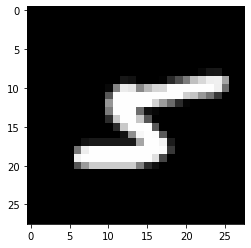

Predicted labels = 8, Correct label = 5


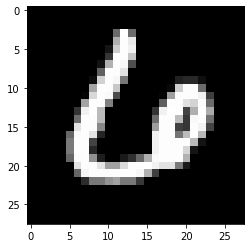

Predicted labels = 0, Correct label = 6


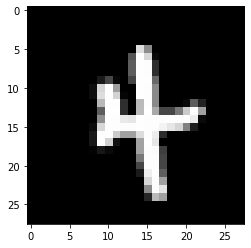

Predicted labels = 9, Correct label = 4


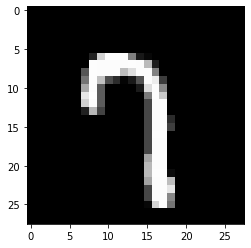

Predicted labels = 9, Correct label = 7


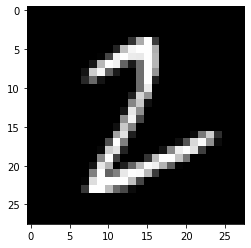

Predicted labels = 3, Correct label = 2


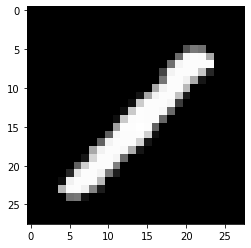

Predicted labels = 8, Correct label = 1


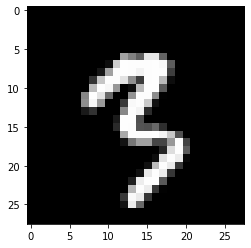

Predicted labels = 9, Correct label = 3


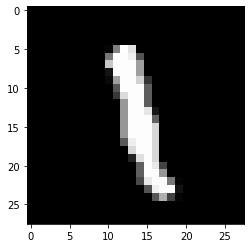

Predicted labels = 8, Correct label = 1


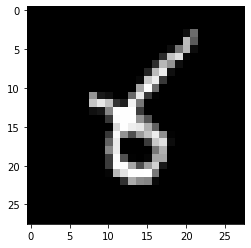

Predicted labels = 8, Correct label = 6


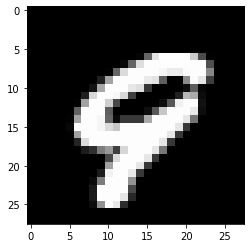

Predicted labels = 4, Correct label = 9


In [50]:
for idx in misclassified_indices[:10]:
    img = test_images[idx].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.show()
    print('Predicted labels = %d, Correct label = %d' % (predicted_labels[idx], test_labels[idx]))

In [51]:
def confunsion_matrix(predicted_labels, ground_truth_labels):
    num_labels = ground_truth_labels.max() + 1
    conf_mat = np.zeros((num_labels, num_labels))
    
    for i in range(len(predicted_labels)):
        conf_mat[ground_truth_labels[i], predicted_labels[i]] += 1
    return  conf_mat
    

In [52]:
conf_mat = confunsion_matrix(predicted_labels, test_labels)

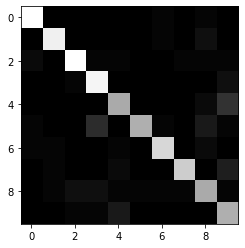

In [53]:
plt.imshow(conf_mat, cmap='gray')